# Problem Statement:  

### The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour. There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts. Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive. Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

# Data Descriptions 

### The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   

## Dataset Includes

#### from above we can see the Data Description and the problem statement from which we can understand that this is a classification problem and we need to predict if the Comment Text is Malignant or not.

lets us now import all the necessary Python Modules and Libraries so we can do proper Importation of the dataset, Exploratory Data Analysis , Model Building and Evaluation of the model in this project we have to use NLP to Predict the Comment is Malignant or not.

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
import re
warnings.filterwarnings('ignore')
import nltk
import missingno as msno
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
%matplotlib inline

lets now import all the dataset and save it in a local variable ds we will import the dataset using pandas.read_csv()

In [2]:
ds = pd.read_csv(r"S:\Data Science Projects\Flip Robo\Malignant Comments Classifier Project\train.csv")
dstest = pd.read_csv(r"S:\Data Science Projects\Flip Robo\Malignant Comments Classifier Project\test.csv")

from above we can see that we have imported the test and train data and saved them in ds and dstest lets start looking at the data and exploring it

# Train Data

In [3]:
ds.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


from above we can see the first 5 rows of the dataset which has 8 columns in total

So we can reomve ID column as it is not important to us so we will drop this column using ds.drop

In [4]:
ds.drop('id',1,inplace=True)

In [5]:
ds

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


from above we can see that we have removed the ID column

now let us extract more information about the dataset using ds.info()

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


from above we can see that we have total of 7 columns and 159570 rows in the dataset and we can also see that there are no missing values in the Dataset lets confirm this by using heatmap

<AxesSubplot:>

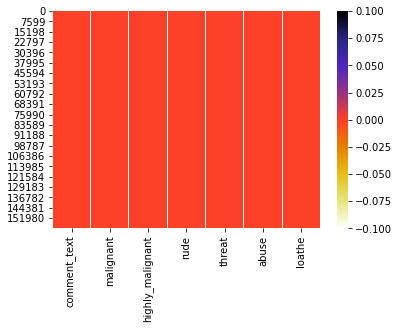

In [7]:
sns.heatmap(ds.isnull(), cmap='CMRmap_r')

from above we can see that there are no missing values in the dataset as the heatmap is unicolor and if it contained some missing values then there must be some other color in the heatmap as well

In [8]:
ds.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

from above we can confirm that there are no misisng values in the dataset

#### Missing Values 

<AxesSubplot:>

<Figure size 360x360 with 0 Axes>

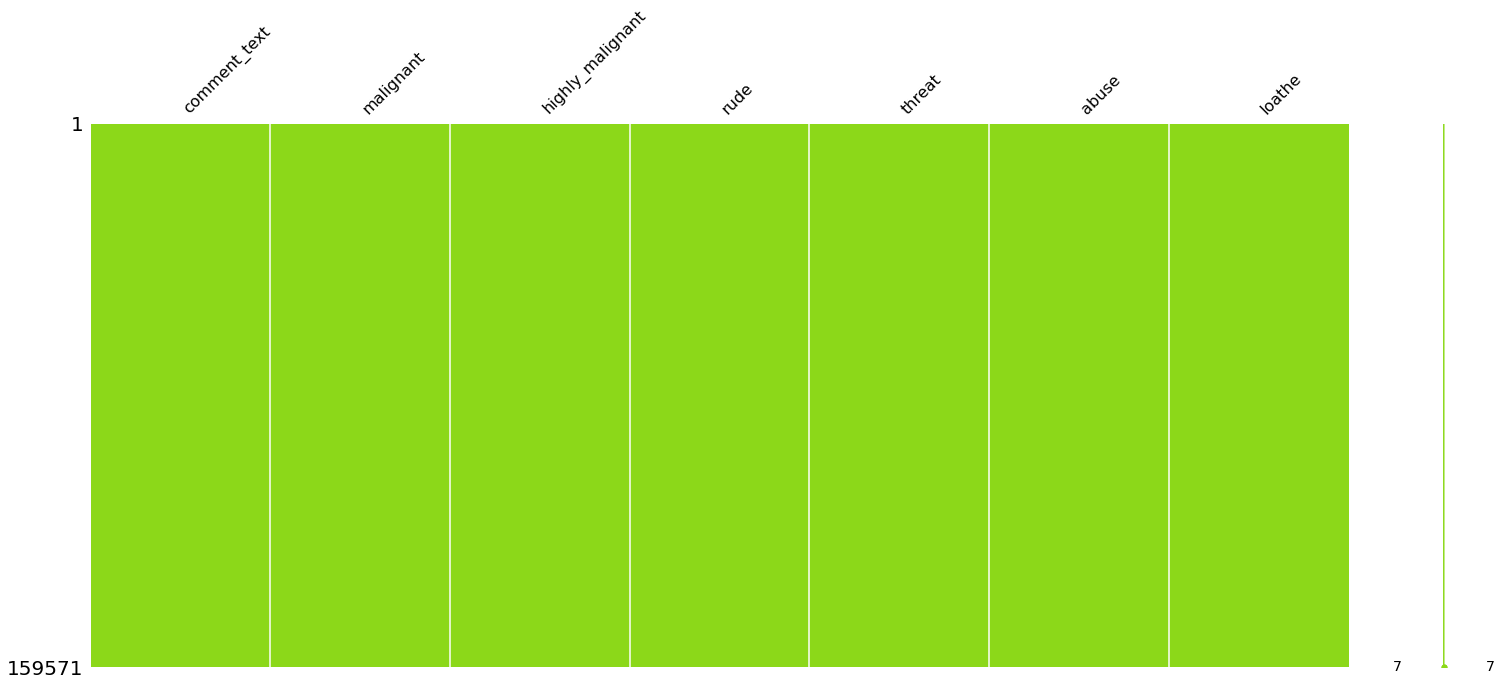

In [9]:
plt.figure(figsize=(5,5))
msno.matrix(ds,color=(0.55, 0.85, 0.1))

#### Null Values 

<AxesSubplot:>

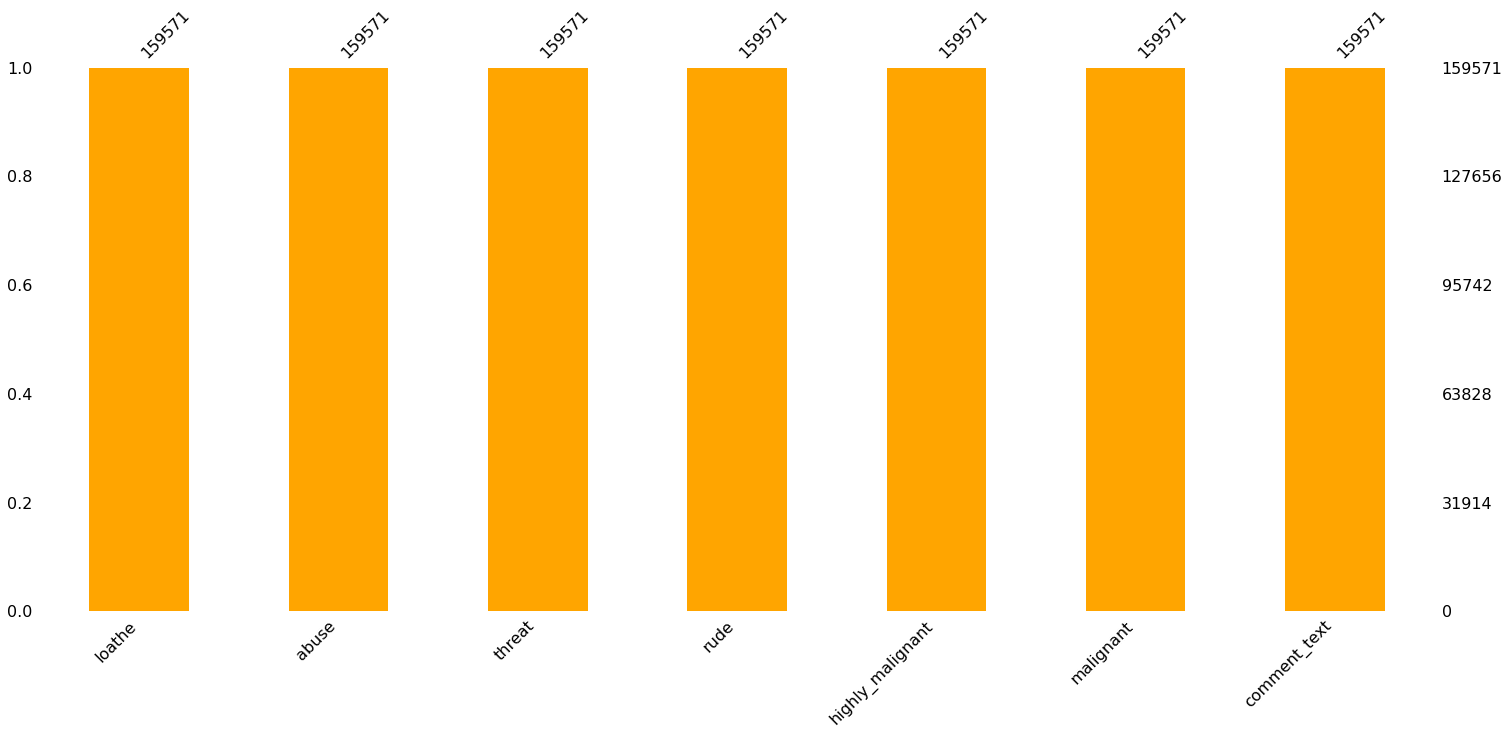

In [10]:
plt.figure(figsize=(5,5))
msno.bar(ds,color='orange',sort='descending')

from above we can see that there are no NUll values and Misisng Values in the dataset 

lets now see if there are any duplicate values in the dataset or not using nunique()

In [11]:
ds['comment_text'].nunique()

159571

from above we can see that there are 159571 rows with unique comments i.e all the rows has different different comments

#### Lets now see the descriptive statistics of the Dataset using ds.describe() 

In [12]:
ds.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### lets now see the Statistics for object values  

In [13]:
ds.describe(include='object')

,comment_text
count,159571
unique,159571
top,"""\nI don't understand your comment about havin..."
freq,1


from this we can understand that there are total 159571 comment_text in the dataset and all the comments are unique

lets check the correlation of the train data

In [14]:
ds.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


from above we can see the correlation of the dataset lets visualize this

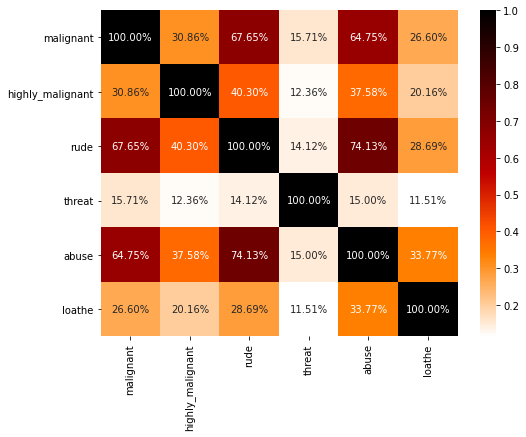

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(ds.corr(),annot=True,fmt='.2%',cmap='gist_heat_r')
plt.show()

from above we can see the correlation between the columns darker the color higher the correlation between the columns

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'malignant'),
  Text(1, 0, 'highly_malignant'),
  Text(2, 0, 'rude'),
  Text(3, 0, 'threat'),
  Text(4, 0, 'abuse'),
  Text(5, 0, 'loathe')])

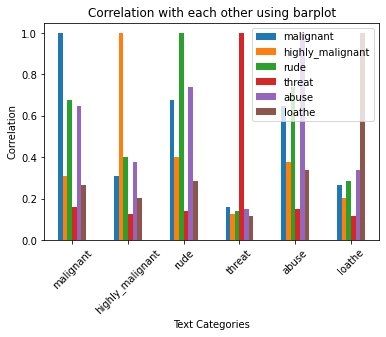

In [16]:
ds.corr().plot(kind='bar')
plt.title("Correlation with each other using barplot")
plt.xlabel("Text Categories")
plt.ylabel("Correlation")
plt.xticks(rotation=45)

# Exploratory Data Analysis 

lets see count plot for the text categories

Counting of labels for: malignant
0    144277
1     15294
Name: malignant, dtype: int64 



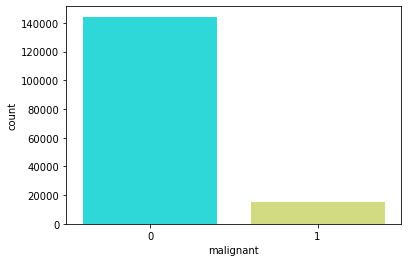

Counting of labels for: highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64 



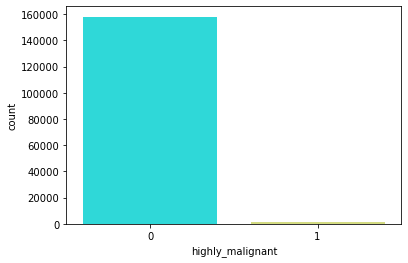

Counting of labels for: loathe
0    158166
1      1405
Name: loathe, dtype: int64 



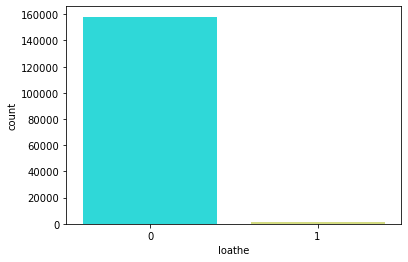

Counting of labels for: rude
0    151122
1      8449
Name: rude, dtype: int64 



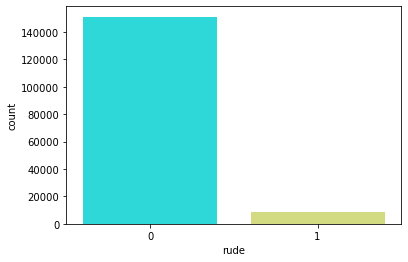

Counting of labels for: abuse
0    151694
1      7877
Name: abuse, dtype: int64 



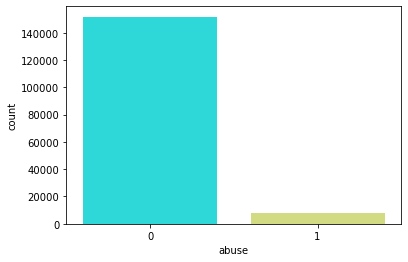

Counting of labels for: threat
0    159093
1       478
Name: threat, dtype: int64 



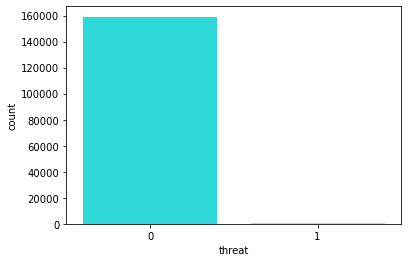

In [17]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print("Counting of labels for:", i)
    sns.countplot(ds[i],palette='rainbow',saturation=0.95)
    print(ds[i].value_counts(),'\n')
    plt.show()

#### Observation

lets create a target features which has all the target feature in it

In [18]:
target = ['malignant','highly_malignant','rude','threat','abuse','loathe']

In [19]:
ds[target].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [20]:
targetlabel = ds[target]
ds['label'] = ds[target].sum(axis=1)

In [21]:
ds

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


In [22]:
ds['label'].sum()

35098

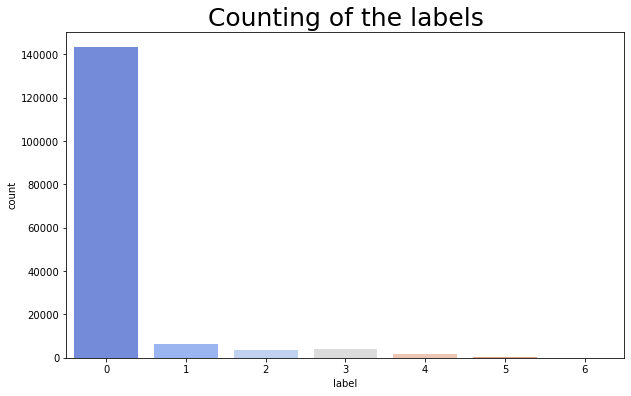

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(ds['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [24]:
ds['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

### Scaling the target feature that is label 

In [25]:
ds['label'] = ds['label'] >0
ds['label'] = ds['label'].astype(int)

lets check the value counts of the label

Text(0.5, 1.0, 'Counting of the labels')

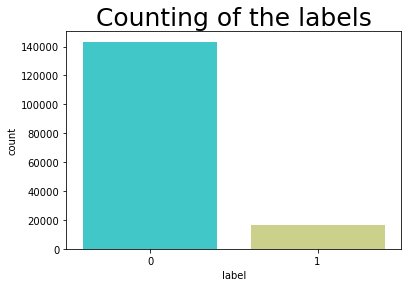

In [26]:
sns.countplot(ds['label'], palette='rainbow')
plt.title('Counting of the labels',fontsize=25)

Creating a new column before cleaning the comment text column

In [27]:
ds['comment_length'] = ds['comment_text'].str.len()
ds.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67


### Lets clean the text by removing the special Characters, new line , Symbols, Numbers, Email Address

In [28]:
def clean(text):
    cleaned = re.compile(r"<.*?>")
    return re.sub(cleaned," ",text)

ds.comment_text = ds.comment_text.apply(clean)

In [29]:
def is_special(text):
    empty = ''
    for i in text:
        if i.isalpha():
            empty = empty + i
        else:
            empty = empty + ' '
    return empty

ds.comment_text = ds.comment_text.apply(is_special)

In [30]:
def lower(text):
    return text.lower()

ds.comment_text = ds.comment_text.apply(lower)

In [31]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','yo','Ja'])
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

In [32]:
ds.comment_text = ds.comment_text.apply(remove_stopwords)

In [33]:
def lema_text(text):
    lema = WordNetLemmatizer()
    return " ".join([lema.lemmatize(w) for w in text])

ds.comment_text = ds.comment_text.apply(lema_text)

In [34]:
ds['cleaned_text'] = ds.comment_text.str.len()
ds.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,cleaned_text
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29


from above we can see that we have reduced the length of the text by removing the stopwords in the comment text

#### Total Length of the text 

In [35]:
print("Origional Length:",ds.comment_length.sum())
print("Cleaned Length:",ds.cleaned_text.sum())
print("Total Words Removed:",(ds.comment_length.sum()) - (ds.cleaned_text.sum()))

Origional Length: 62893130
Cleaned Length: 38788758
Total Words Removed: 24104372


#### lets now see the distribution of the comment_text before cleaning 

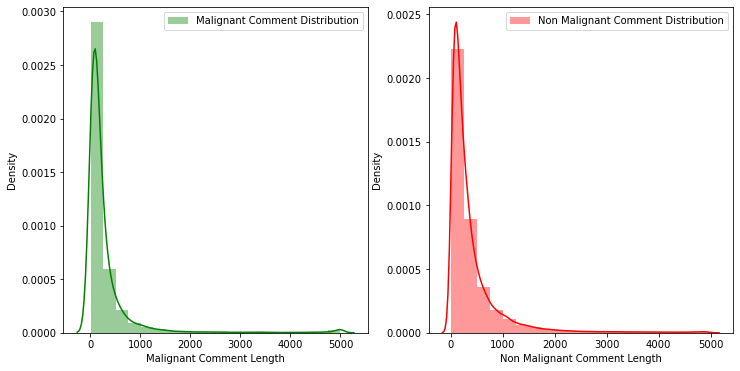

In [36]:
f,ax = plt.subplots(1,2,figsize=(12,6))

sns.distplot(ds[ds['label']==1]['comment_length'],bins=20, ax=ax[0],label='Malignant Comment Distribution',color='g')
ax[0].set_xlabel('Malignant Comment Length')
ax[0].legend()

sns.distplot(ds[ds['label']==0]['comment_length'],bins=20, ax=ax[1],label='Non Malignant Comment Distribution',color='r')
ax[1].set_xlabel('Non Malignant Comment Length')
ax[1].legend()

plt.show()

#### Distribution after cleaning the comment_text after cleaning

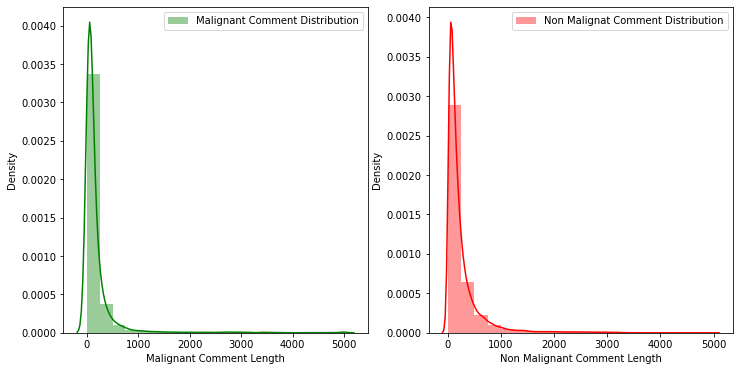

In [37]:
f,ax = plt.subplots(1,2,figsize=(12,6))

sns.distplot(ds[ds['label']==1]['cleaned_text'],bins=20, ax=ax[0],label='Malignant Comment Distribution',color='g')
ax[0].set_xlabel('Malignant Comment Length')
ax[0].legend()

sns.distplot(ds[ds['label']==0]['cleaned_text'],bins=20, ax=ax[1],label='Non Malignat Comment Distribution',color='r')
ax[1].set_xlabel('Non Malignant Comment Length')
ax[1].legend()

plt.show()

#### lets check the words which are used in the malignant comments

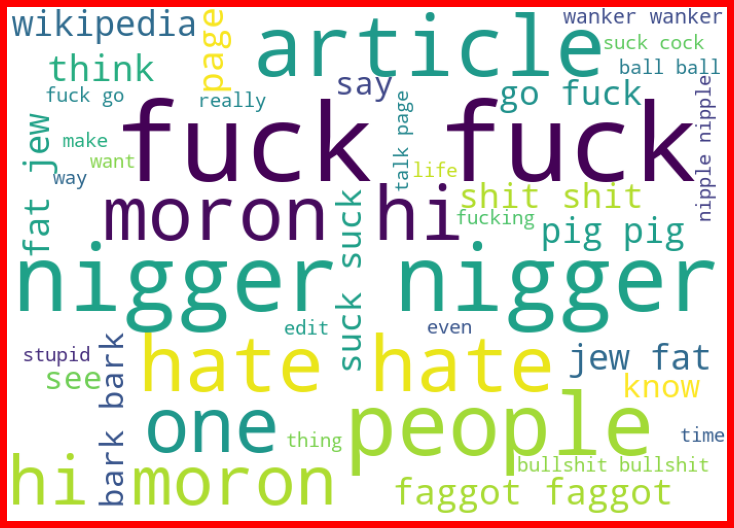

In [38]:
spams = ds['comment_text'][ds['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Words which are used in Non malignant comments 

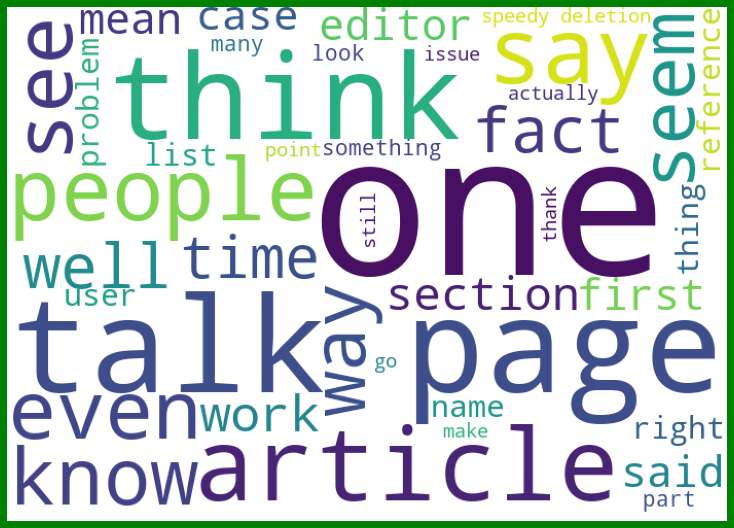

In [39]:
spams = ds['comment_text'][ds['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Words which are used in Loathe Comments

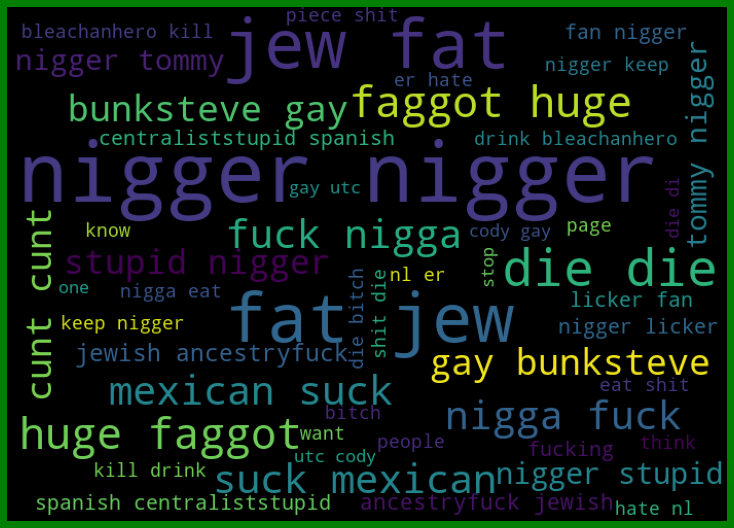

In [40]:
offensive = ds['comment_text'][ds['loathe']==1]
spam_cloud = WordCloud(width=700,height=500,background_color='black',max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### words which are used in abusive comments

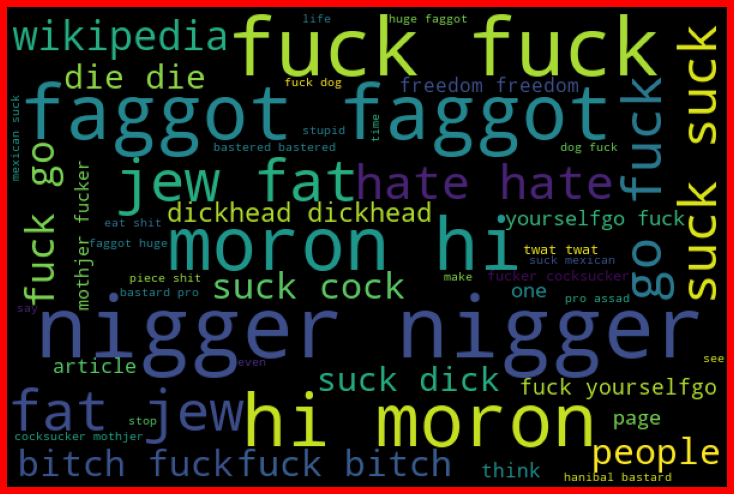

In [41]:
offensive = ds['comment_text'][ds['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

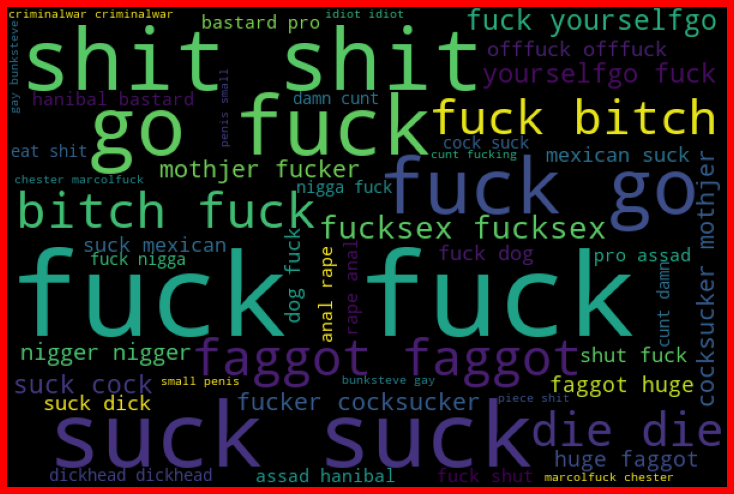

In [42]:
offensive = ds['comment_text'][ds['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

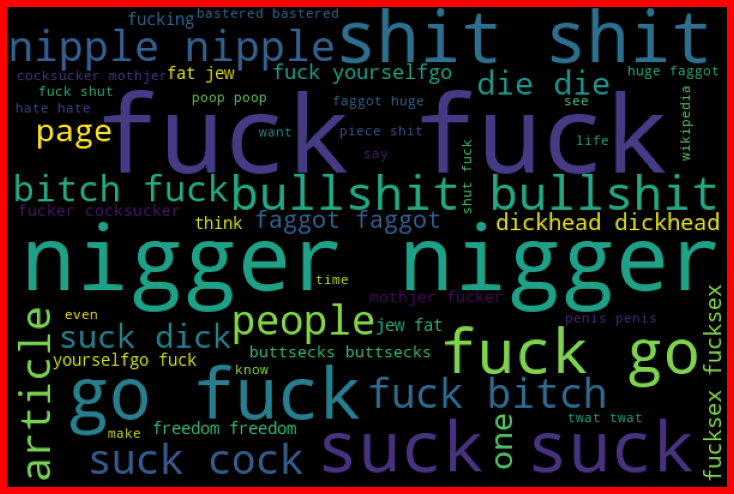

In [43]:
offensive = ds['comment_text'][ds['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

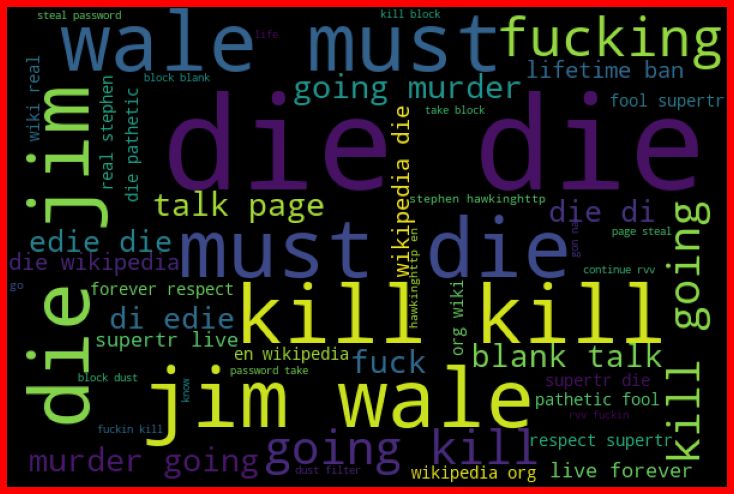

In [44]:
offensive = ds['comment_text'][ds['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### from above we can see the Words used for all the Categories of comments 

lets now convert the text into vectors using tfidf vectorizer

In [45]:
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [46]:
X = tf_vec.fit_transform(ds['comment_text'])
Y = ds['label']

In [47]:
print("Count of Non Malignant and Malignant Comments:\n",ds.label.value_counts())

Count of Non Malignant and Malignant Comments:
 0    143346
1     16225
Name: label, dtype: int64


In [48]:
ds['label'].value_counts(normalize=True) *100

0    89.832112
1    10.167888
Name: label, dtype: float64

### from above we can see that the dataset is highly imbalanced so we will fix this by using oversampler, SMOTtomek 

lets train test and split the dataset using train_test_split()

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=42)

In [50]:
lr = LogisticRegression()
lr.fit(X_train ,Y_train)
pred = lr.predict(X_test)
print("Accuracy Score: ", accuracy_score(Y_test, pred)*100)
print("Confusion Matrix: ", confusion_matrix(Y_test, pred))
print("Classification Report: ", classification_report(Y_test, pred))
score  = cross_val_score(lr,X,Y,cv=5)
score = score.mean()*100
print("Cross Val Score: ", score)

Accuracy Score:  95.63607360565145
Confusion Matrix:  [[31378   164]
 [ 1368  2196]]
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.99      0.98     31542
           1       0.93      0.62      0.74      3564

    accuracy                           0.96     35106
   macro avg       0.94      0.81      0.86     35106
weighted avg       0.96      0.96      0.95     35106

Cross Val Score:  95.5994507642548


from above we can see that we are getting a very high accuracy score about 96% but recall and precision is low because of imbalanced dataset

lets do oversampling of the data and see which one is performing well

In [51]:
os = RandomOverSampler(0.75)
X_train_os,Y_train_os = os.fit_resample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_os)))

The number of classes before fit Counter({0: 111804, 1: 12661})
The number of classes after fit Counter({0: 111804, 1: 83853})


lets see how the model is performing after over sampling

In [52]:
lr = LogisticRegression()
lr.fit(X_train_os ,Y_train_os)
pred = lr.predict(X_test)
print("Accuracy Score: ", accuracy_score(Y_test, pred)*100)
print("Confusion Matrix: ", confusion_matrix(Y_test, pred))
print("Classification Report: ", classification_report(Y_test, pred))
score  = cross_val_score(lr,X,Y,cv=5)
score = score.mean()*100
print("Cross Val Score: ", score)

Accuracy Score:  94.55933458668035
Confusion Matrix:  [[30221  1321]
 [  589  2975]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.96      0.97     31542
           1       0.69      0.83      0.76      3564

    accuracy                           0.95     35106
   macro avg       0.84      0.90      0.86     35106
weighted avg       0.95      0.95      0.95     35106

Cross Val Score:  95.5994507642548


from above we can see that we have increased the recall and f1_score after using Random Over sampler lets us SMOTEtomek and see the difference

In [53]:
st = SMOTETomek(0.90)
X_train_st,Y_train_st = st.fit_resample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_st)))

The number of classes before fit Counter({0: 111804, 1: 12661})
The number of classes after fit Counter({0: 111792, 1: 100611})


In [54]:
lr = LogisticRegression()
lr.fit(X_train_st ,Y_train_st)
pred = lr.predict(X_test)
print("Accuracy Score: ", accuracy_score(Y_test, pred)*100)
print("Confusion Matrix: ", confusion_matrix(Y_test, pred))
print("Classification Report: ", classification_report(Y_test, pred))
score  = cross_val_score(lr,X,Y,cv=5)
score = score.mean()*100
print("Cross Val Score: ", score)

Accuracy Score:  91.74784937047798
Confusion Matrix:  [[29201  2341]
 [  556  3008]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.93      0.95     31542
           1       0.56      0.84      0.67      3564

    accuracy                           0.92     35106
   macro avg       0.77      0.88      0.81     35106
weighted avg       0.94      0.92      0.92     35106

Cross Val Score:  95.5994507642548


from above we can see that random over sampling has done well so we will use random over sampling for our prediction

lets find the best random state for the model and then we will use that random state for all the algorithms

In [55]:
maxacc = 0
maxrs = 0
model = 0
for i in range(0,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=i)
    os = RandomOverSampler(0.75)
    X_train_os,Y_train_os = os.fit_resample(X_train,Y_train)
    lr = LogisticRegression()
    lr.fit(X_train_os, Y_train_os)
    pred = lr.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
            
print("Maximum accuracy is {} for random state {}".format(maxacc, maxrs))

Maximum accuracy is 0.9483564063123113 for random state 279


from above we can see that we are getting 95% accuracy at random state 124 so we will use random state as 124 for all the models

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=124)
os = RandomOverSampler(0.75)
X_train_os, Y_train_os = os.fit_resample(X_train, Y_train)

In [57]:
print("Logistic Regression")
lr = LogisticRegression()
lr.fit(X_train_os, Y_train_os)
predlr = lr.predict(X_test)
acclr = accuracy_score(Y_test, predlr)*100
print("Accuracy Score:", acclr)
print("Confusion Matrix: ", confusion_matrix(Y_test, predlr))
print("Classification Report: ", classification_report(Y_test, predlr))
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100
print("Cross Validation Score: ", scorelr)

Logistic Regression
Accuracy Score: 94.78721586053666
Confusion Matrix:  [[30319  1269]
 [  561  2957]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.96      0.97     31588
           1       0.70      0.84      0.76      3518

    accuracy                           0.95     35106
   macro avg       0.84      0.90      0.87     35106
weighted avg       0.95      0.95      0.95     35106

Cross Validation Score:  95.5994507642548


In [58]:
print("Decision Tree Classifier")
dtc = DecisionTreeClassifier()
dtc.fit(X_train_os, Y_train_os)
preddtc = dtc.predict(X_test)
accdtc = accuracy_score(Y_test, preddtc)*100
print("Accuracy Score: ", accdtc)
print("Confusion Matrix: ", confusion_matrix(Y_test, preddtc))
print("Classification Report: ", classification_report(Y_test, preddtc))
scoredtc = cross_val_score(dtc, X, Y, cv = 5)
scoredtc = scoredtc.mean()*100
print("Cross Val score: ", scoredtc)

Decision Tree Classifier
Accuracy Score:  92.99265082891813
Confusion Matrix:  [[30057  1531]
 [  929  2589]]
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.95      0.96     31588
           1       0.63      0.74      0.68      3518

    accuracy                           0.93     35106
   macro avg       0.80      0.84      0.82     35106
weighted avg       0.94      0.93      0.93     35106

Cross Val score:  94.09792514704277


In [59]:
print("Extra Tree Classifier")
etc = ExtraTreeClassifier()
etc.fit(X_train_os, Y_train_os)
predetc = etc.predict(X_test)
accetc = accuracy_score(Y_test, predetc)*100
print("Accuracy Score: ", accetc)
print("Confusion Matrix: ", confusion_matrix(Y_test, predetc))
print("Classification Report: ", classification_report(Y_test, predetc))
scoreetc = cross_val_score(etc, X, Y, cv =5)
scoreetc = scoreetc.mean()*100
print("Cross Val Score: ", scoreetc)

Extra Tree Classifier
Accuracy Score:  92.24349114111547
Confusion Matrix:  [[30113  1475]
 [ 1248  2270]]
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.95      0.96     31588
           1       0.61      0.65      0.63      3518

    accuracy                           0.92     35106
   macro avg       0.78      0.80      0.79     35106
weighted avg       0.92      0.92      0.92     35106

Cross Val Score:  92.21537941576126


In [60]:
print("Random Forest Classifier")
rfc = RandomForestClassifier()
rfc.fit(X_train_os, Y_train_os)
predrfc = rfc.predict(X_test)
accrfc = accuracy_score(Y_test, predrfc)*100
print("Accuracy Score: ", accrfc)
print("Confusion Matrix: ", confusion_matrix(Y_test, predrfc))
print("Classification Report: ", classification_report(Y_test, predrfc))
scorerfc = cross_val_score(rfc, X, Y, cv =5)
scorerfc = scorerfc.mean()*100
print("Cross Val Score: ", scorerfc)

Random Forest Classifier
Accuracy Score:  95.47370819802883
Confusion Matrix:  [[31098   490]
 [ 1099  2419]]
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.98      0.98     31588
           1       0.83      0.69      0.75      3518

    accuracy                           0.95     35106
   macro avg       0.90      0.84      0.86     35106
weighted avg       0.95      0.95      0.95     35106

Cross Val Score:  95.7003464906877


In [61]:
print("AdaBoost Classifier")
adb = AdaBoostClassifier()
adb.fit(X_train_os, Y_train_os)
predadb = adb.predict(X_test)
accadb = accuracy_score(Y_test, predadb)*100
print("Accuracy Score: ", accadb)
print("Confusion Matrix: ", confusion_matrix(Y_test, predadb))
print("Classification Report: ", classification_report(Y_test, predadb))
scoreadb = cross_val_score(adb, X, Y, cv =5)
scoreadb = scoreadb.mean()*100
print("Cross Val Score: ", scoreadb)

AdaBoost Classifier
Accuracy Score:  92.94707457414687
Confusion Matrix:  [[30218  1370]
 [ 1106  2412]]
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.96      0.96     31588
           1       0.64      0.69      0.66      3518

    accuracy                           0.93     35106
   macro avg       0.80      0.82      0.81     35106
weighted avg       0.93      0.93      0.93     35106

Cross Val Score:  94.562295282625


In [62]:
print("Kneighbors Classifier")
knn = KNeighborsClassifier()
knn.fit(X_train_os, Y_train_os)
predknn = knn.predict(X_test)
accknn = accuracy_score(Y_test, predknn)*100
print("Accuracy Score: ", accknn)
print("Confusion Matrix: ", confusion_matrix(Y_test, predknn))
print("Classification Report: ", classification_report(Y_test, predknn))
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoreknn.mean()*100
print("Cross Val Score: ", scoreknn)

Kneighbors Classifier
Accuracy Score:  73.49171081866348
Confusion Matrix:  [[23747  7841]
 [ 1465  2053]]
Classification Report:                precision    recall  f1-score   support

           0       0.94      0.75      0.84     31588
           1       0.21      0.58      0.31      3518

    accuracy                           0.73     35106
   macro avg       0.57      0.67      0.57     35106
weighted avg       0.87      0.73      0.78     35106

Cross Val Score:  91.82244898313834


In [63]:
print("XGBClassifier")
xgb = XGBClassifier(verbosity=0)
xgb.fit(X_train_os, Y_train_os)
predxgb = xgb.predict(X_test)
accxgb = accuracy_score(Y_test, predxgb)*100
print("Accuracy Score: ", accxgb)
print("Confusion Matrix: ", confusion_matrix(Y_test, predxgb))
print("Classification Report: ", classification_report(Y_test, predxgb))
scorexgb = cross_val_score(xgb, X, Y, cv= 5)
scorexgb = scorexgb.mean()*100
print("Cross Val Score: ", scorexgb)

XGBClassifier
Accuracy Score:  95.14897738278357
Confusion Matrix:  [[30797   791]
 [  912  2606]]
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.97      0.97     31588
           1       0.77      0.74      0.75      3518

    accuracy                           0.95     35106
   macro avg       0.87      0.86      0.86     35106
weighted avg       0.95      0.95      0.95     35106

Cross Val Score:  95.38825949981057


In [64]:
print("XGBRFCLassifier")
xgbrfc = XGBRFClassifier(verbosity=0)
xgbrfc.fit(X_train_os, Y_train_os)
predxgbrfc = xgbrfc.predict(X_test)
accxgbrfc = accuracy_score(Y_test, predxgbrfc)*100
print("Accuracy Score: ", accrfc)
print("Confusion Matrix: ", confusion_matrix(Y_test, predxgbrfc))
print("Classification Report: ", classification_report(Y_test, predxgbrfc))
scorexgbrfc = cross_val_score(xgbrfc, X, Y, cv = 5)
scorexgbrfc = scorexgbrfc.mean()*100
print("Cross Val Score: ", scorexgbrfc)

XGBRFCLassifier
Accuracy Score:  95.47370819802883
Confusion Matrix:  [[31424   164]
 [ 2242  1276]]
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.99      0.96     31588
           1       0.89      0.36      0.51      3518

    accuracy                           0.93     35106
   macro avg       0.91      0.68      0.74     35106
weighted avg       0.93      0.93      0.92     35106

Cross Val Score:  93.273213885928


from above we can see that we have successfully fitted all out ML Algorithm at Random State 124 and lets compare the model which has performed well and then we will choose some model for HyperParameter Tuning

from above by looking ar f1 score, precesion and recall we have selected Logistic Regression, Decision Tree classifier, Random Forest, XGBoost Classifier for Hyper Parameter Tuning because this algorithm has higher Accuracy score, recall, precision and f1 score

In [65]:
parameterlr = {
    'penalty':['l1','l2','elasticnet','none'],
    'C':[1.0,2.0,3.0]
}

In [66]:
gscvlr = GridSearchCV(lr, parameterlr)
gscvlr.fit(X_train_os, Y_train_os)
predgscvlr = gscvlr.best_estimator_.predict(X_test)
accgscvlr = accuracy_score(Y_test, predgscvlr)*100
print("Accuracy score: ", accgscvlr)
print("Confusion Matrix: ", confusion_matrix(Y_test, predgscvlr))
print("Classification Report: ", classification_report(Y_test, predgscvlr))

Accuracy score:  93.49398963140204
Confusion Matrix:  [[30041  1547]
 [  737  2781]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.95      0.96     31588
           1       0.64      0.79      0.71      3518

    accuracy                           0.93     35106
   macro avg       0.81      0.87      0.84     35106
weighted avg       0.94      0.93      0.94     35106



In [67]:
parameterdtc = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,3],
    'max_features':['auto','sqrt','log2']
}

In [68]:
gscvdtc = GridSearchCV(dtc, parameterdtc)
gscvdtc.fit(X_train_os, Y_train_os)
predgscvdtc = gscvdtc.best_estimator_.predict(X_test)
accgscvdtc = accuracy_score(Y_test, predgscvdtc)*100
print("Accuracy Score: ", accgscvdtc)
print("Confusion Matrix: ", confusion_matrix(Y_test, predgscvdtc))
print("Classification Report: ", classification_report(Y_test, predgscvdtc))

Accuracy Score:  89.97892098216829
Confusion Matrix:  [[31588     0]
 [ 3518     0]]
Classification Report:                precision    recall  f1-score   support

           0       0.90      1.00      0.95     31588
           1       0.00      0.00      0.00      3518

    accuracy                           0.90     35106
   macro avg       0.45      0.50      0.47     35106
weighted avg       0.81      0.90      0.85     35106



In [69]:
parameterrfc = {
    'n_estimators':[100,200,300],
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3],
    'max_features':['auto','sqrt','log2']
}

In [70]:
gscvrfc = GridSearchCV(rfc, parameterrfc)
gscvrfc.fit(X_train_os, Y_train_os)
predgscvrfc = gscvrfc.best_estimator_.predict(X_test)
accgscvrfc = accuracy_score(Y_test, predgscvrfc)*100
print("Accuracy Score: ", accgscvrfc)
print("Confusion Matrix: ", confusion_matrix(Y_test, predgscvrfc))
print("Classification Report: ", classification_report(Y_test, predgscvrfc))

Accuracy Score:  90.15837748533015
Confusion Matrix:  [[31588     0]
 [ 3455    63]]
Classification Report:                precision    recall  f1-score   support

           0       0.90      1.00      0.95     31588
           1       1.00      0.02      0.04      3518

    accuracy                           0.90     35106
   macro avg       0.95      0.51      0.49     35106
weighted avg       0.91      0.90      0.86     35106



In [71]:
parameterxgb = {
    'booster':['gbtree','gblinear','dart'],
    'verbosity':[0],
}

In [72]:
gscvxgb = GridSearchCV(xgb, parameterxgb)
gscvxgb.fit(X_train_os, Y_train_os)
predgscvxgb = gscvxgb.best_estimator_.predict(X_test)
accgscvxgb = accuracy_score(Y_test, predgscvxgb)*100
print("Accuracy Score: ",accgscvxgb)
print("Confusion Matrix: ", confusion_matrix(Y_test, predgscvxgb))
print("Classification Report: ", classification_report(Y_test, predgscvxgb))

Accuracy Score:  95.14897738278357
Confusion Matrix:  [[30797   791]
 [  912  2606]]
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.97      0.97     31588
           1       0.77      0.74      0.75      3518

    accuracy                           0.95     35106
   macro avg       0.87      0.86      0.86     35106
weighted avg       0.95      0.95      0.95     35106



from above we can see that XGBoost and Logistic Regression is outperforming Decision Tree and Random Forest because of recall and F1 score so now we will chosse the best model using AUC ROC CURVE

In [76]:
fpr, tpr, thresholds = roc_curve(Y_test, predgscvlr)
roc_auc = auc(fpr, tpr)
fpr1, tpr1, thresholds = roc_curve(Y_test, predgscvxgb)
roc_auc1 = auc(fpr1, tpr1)

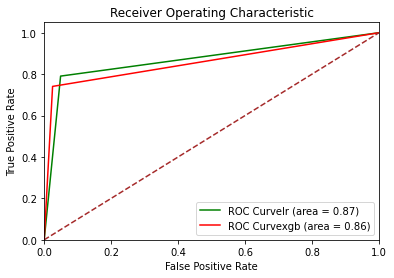

In [78]:
plt.figure()
plt.plot(fpr, tpr, color='green', label = "ROC Curvelr (area = %0.2f)" %roc_auc)
plt.plot(fpr1, tpr1, color='red', label = "ROC Curvexgb (area = %0.2f)" %roc_auc1)
plt.plot([0,1],[0,1], color='brown', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

## from above we can see that Logistic Regression is measuring the performance across all possible classification thresholds with an Area under Curve of 87% so we are choosing this model.

In [79]:
joblib.dump(gscvlr.best_estimator_, 'Malignant_Comment_Detection.pkl')

['Malignant_Comment_Detection.pkl']

# Test Data

### Test Data Cleaning

In [80]:
dstest.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [81]:
dstest.drop('id',1,inplace=True)

In [82]:
dstest.comment_text = dstest.comment_text.apply(clean)


dstest.comment_text = dstest.comment_text.apply(is_special)

dstest.comment_text = dstest.comment_text.apply(lower)


dstest.comment_text = dstest.comment_text.apply(remove_stopwords)


dstest.comment_text = dstest.comment_text.apply(lema_text)

In [83]:
test_data =tf_vec.fit_transform(dstest['comment_text'])
test_data

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 2889641 stored elements in Compressed Sparse Row format>

In [84]:
model = joblib.load("S:\Data Science Projects\Flip Robo\Malignant Comments Classifier Project\Malignant_Comment_Detection.pkl")

In [85]:
predicted = model.predict(test_data)

In [86]:
predicted

array([0, 1, 0, ..., 0, 0, 0])

In [90]:
compare = {
    'Text':dstest['comment_text'],
    'Predicted':predicted
}

In [91]:
Compare = pd.DataFrame.from_dict(compare)

## from above we have successfully imported our saved model and predicted the Malignant Comments